# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [1]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
#paso2
header = {'User-Agent': 'my-app/0.0.1'}
resource_url = "https://en.wikipedia.org/wiki/List_of_Spotify_streaming_records"
response = requests.get(resource_url, time.sleep(3), headers= header)
response

<Response [200]>

In [3]:
#paso3
if response:
    soup = BeautifulSoup(response.text, 'html.parser')
    #tables = soup.find('table')
    #tables
    tables = pd.read_html(str(soup))
    #print(len(tables))
    #print(tables[0].head())
df = tables[0]
df.head()

/tmp/ipykernel_758/1386309473.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(str(soup))


,Rank,Song,Artist(s),Streams (billions),Release date,Ref.
0,1,"""Blinding Lights""",The Weeknd,5.061,29 November 2019,[1]
1,2,"""Shape of You""",Ed Sheeran,4.582,6 January 2017,[2]
2,3,"""Starboy""",The Weeknd and Daft Punk,4.128,21 September 2016,[3]
3,4,"""Someone You Loved""",Lewis Capaldi,4.077,8 November 2018,[4]
4,5,"""Sweater Weather""",The Neighbourhood,4.071,3 December 2012,[5]


In [4]:
#paso4
df.columns = [col.strip().replace('\n', ' ').replace('  ', ' ') for col in df.columns]
df = df.drop(columns=['Ref.'])
df['Release date'] = pd.to_datetime(df['Release date'], errors ='coerce')
df['Release date'] = df['Release date'].dt.strftime('%d/%m/%Y')
df

,Rank,Song,Artist(s),Streams (billions),Release date
0,1,"""Blinding Lights""",The Weeknd,5.061,29/11/2019
1,2,"""Shape of You""",Ed Sheeran,4.582,06/01/2017
2,3,"""Starboy""",The Weeknd and Daft Punk,4.128,21/09/2016
3,4,"""Someone You Loved""",Lewis Capaldi,4.077,08/11/2018
4,5,"""Sweater Weather""",The Neighbourhood,4.071,03/12/2012
...,...,...,...,...,...
96,97,"""Sweet Child O' Mine""",Guns N' Roses,2.431,03/06/1988
97,98,"""Creep""",Radiohead,2.427,21/09/1992
98,99,"""Levitating""",Dua Lipa and DaBaby,2.426,01/10/2020
99,100,"""Jocelyn Flores""",XXXTentacion,2.421,31/10/2017


In [5]:
#Paso 5
dfsql = sqlite3.connect('spotify_top_canciones.db')
df.to_sql('mas_sonados', dfsql, if_exists = 'replace', index= False)
cursor = dfsql.cursor()
dfsql.commit()
#dfsql.close()

In [6]:
#Paso 6. Mostrar los resultados
cursor.execute("SELECT * FROM mas_sonados")
result = cursor.fetchall()
for row in result:
    print(row)

('1', '"Blinding Lights"', 'The Weeknd', '5.061', '29/11/2019')
('2', '"Shape of You"', 'Ed Sheeran', '4.582', '06/01/2017')
('3', '"Starboy"', 'The Weeknd and Daft Punk', '4.128', '21/09/2016')
('4', '"Someone You Loved"', 'Lewis Capaldi', '4.077', '08/11/2018')
('5', '"Sweater Weather"', 'The Neighbourhood', '4.071', '03/12/2012')
('6', '"As It Was"', 'Harry Styles', '4.062', '01/04/2022')
('7', '"Sunflower"', 'Post Malone and Swae Lee', '3.978', '18/10/2018')
('8', '"One Dance"', 'Drake with Wizkid and Kyla', '3.816', '05/04/2016')
('9', '"Stay"', 'The Kid Laroi and Justin Bieber', '3.683', '09/07/2021')
('10', '"Perfect"', 'Ed Sheeran', '3.649', '03/03/2017')
('11', '"Believer"', 'Imagine Dragons', '3.601', '01/02/2017')
('12', '"Heat Waves"', 'Glass Animals', '3.543', '29/06/2020')
('13', '"Lovely"', 'Billie Eilish and Khalid', '3.485', '19/04/2018')
('14', '"Closer"', 'The Chainsmokers and Halsey', '3.437', '29/07/2016')
('15', '"Say You Won\'t Let Go"', 'James Arthur', '3.416', 

In [15]:
df_top10 = df.sort_values(by='Streams (billions)', ascending=False).head(10)
df_top10['Streams (billions)'].dtype

dtype('O')

In [16]:
order = df.sort_values(by='Streams (billions)', ascending=False)
order['Song']

0      "Blinding Lights"
1         "Shape of You"
2              "Starboy"
3    "Someone You Loved"
4      "Sweater Weather"
5            "As It Was"
6            "Sunflower"
7            "One Dance"
8                 "Stay"
9              "Perfect"
Name: Song, dtype: object

/tmp/ipykernel_758/3709724359.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Song', y='Streams (billions)', data= df_top10, palette='viridis')


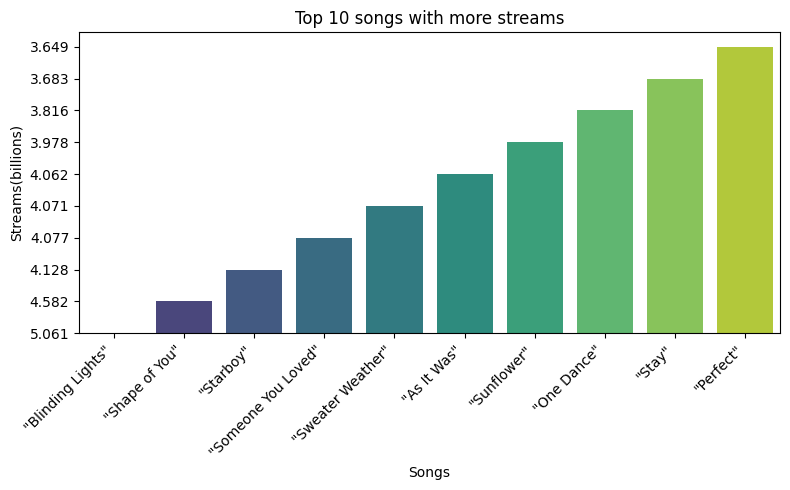

In [ ]:
#Paso 6. Gráfico de barras con Matplotlip i Seaborn
plt.figure(figsize=(8,5))
sns.barplot(x='Song', y='Streams (billions)', data= df_top10, palette='viridis')
plt.title('Top 10 songs with more streams')
plt.xlabel('Songs')
plt.ylabel('Streams(billions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

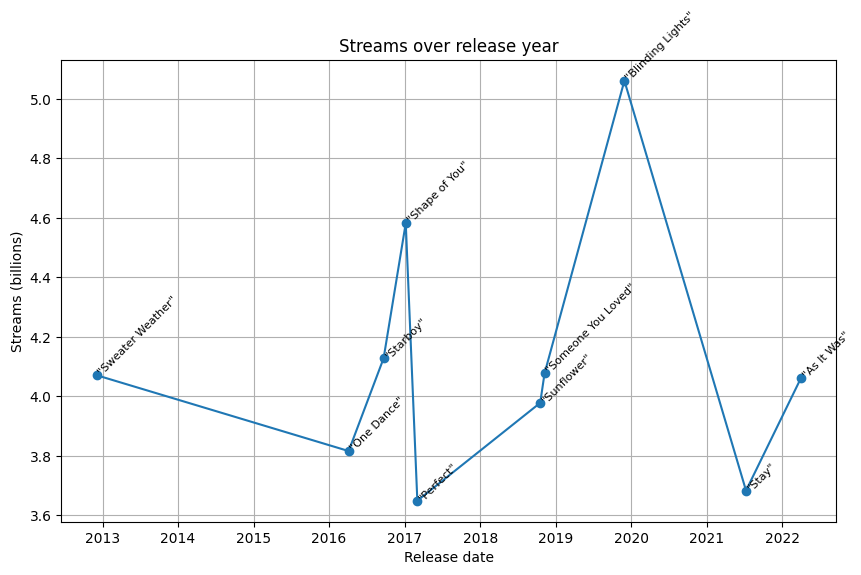

In [29]:
#Paso 6. Gráfico de líneas para ver como evolucionan los streams según las fechas de lanzamiento.
#import matplotlib.dates as mdates

df['Streams (billions)'] = df['Streams (billions)'].astype(float)

df['Release date'] = pd.to_datetime(df['Release date'], format = '%Y-%m-%d')

df_time_sorted = df.sort_values('Release date')

plt.figure(figsize=(10,6))
plt.plot(df_time_sorted['Release date'], df_time_sorted['Streams (billions)'], marker='o', linestyle='-')
plt.title('Streams over release year')
plt.xlabel('Release date')
plt.ylabel('Streams (billions)')
plt.grid(True)
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
#plt.xticks(rotation=45)
#plt.tight_layout()
for i, song in enumerate(df_time_sorted['Song']):
    plt.annotate(song, (df_time_sorted['Release date'].iloc[i], df_time_sorted['Streams (billions)'].iloc[i]), fontsize=8, rotation=45)
plt.show()

